In [2]:
from lxml import html
import operator
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
page = requests.get('http://www.hallofstats.com/#all')
tree = html.fromstring(page.content)
playerNames = tree.xpath('//ol[@id="player-list"]//li[not(contains(@class, "hof not-hos"))]//a[@href]//strong/text()')

playerNamesList = [n.replace('\n', '') for n in playerNames]

playerNamesList

['Babe Ruth',
 'Barry Bonds',
 'Walter Johnson',
 'Cy Young',
 'Willie Mays',
 'Ty Cobb',
 'Hank Aaron',
 'Roger Clemens',
 'Rogers Hornsby',
 'Honus Wagner',
 'Tris Speaker',
 'Ted Williams',
 'Stan Musial',
 'Eddie Collins',
 'Pete Alexander',
 'Lou Gehrig',
 'Mickey Mantle',
 'Lefty Grove',
 'Rickey Henderson',
 'Kid Nichols',
 'Nap Lajoie',
 'Mike Schmidt',
 'Mel Ott',
 'Tom Seaver',
 'Greg Maddux',
 'Randy Johnson',
 'Cap Anson',
 'Frank Robinson',
 'Christy Mathewson',
 'Jimmie Foxx',
 'Joe Morgan',
 'Eddie Mathews',
 'Bert Blyleven',
 'Roberto Clemente',
 'Phil Niekro',
 'Cal Ripken',
 'Pedro Martinez',
 'Al Kaline',
 'Wade Boggs',
 'Roger Connor',
 'Carl Yastrzemski',
 'Johnny Bench',
 'Dan Brouthers',
 'George Brett',
 'Warren Spahn',
 'Gaylord Perry',
 'Curt Schilling',
 'Ken Griffey',
 'Bob Gibson',
 'Eddie Plank',
 'Joe DiMaggio',
 'George Davis',
 'Gary Carter',
 'Steve Carlton',
 'Jeff Bagwell',
 'Mike Mussina',
 'Charlie Gehringer',
 'Carlton Fisk',
 'Rod Carew',
 'Fergi

In [4]:
playerRating = tree.xpath('//ol[@id="player-list"]//li[not(contains(@class, "hof not-hos"))]//a[@href]//span/text()')

playerRatingList = [n.replace('\n', '') for n in playerRating]

playerRatingList

['399',
 '362',
 '337',
 '336',
 '336',
 '319',
 '296',
 '294',
 '289',
 '284',
 '280',
 '279',
 '263',
 '253',
 '251',
 '241',
 '238',
 '233',
 '231',
 '230',
 '227',
 '227',
 '226',
 '220',
 '220',
 '219',
 '215',
 '211',
 '209',
 '206',
 '202',
 '192',
 '190',
 '190',
 '187',
 '187',
 '187',
 '186',
 '186',
 '185',
 '184',
 '181',
 '180',
 '179',
 '176',
 '174',
 '172',
 '172',
 '170',
 '168',
 '167',
 '167',
 '166',
 '166',
 '164',
 '164',
 '159',
 '158',
 '157',
 '157',
 '156',
 '154',
 '151',
 '150',
 '149',
 '149',
 '148',
 '147',
 '146',
 '146',
 '146',
 '145',
 '145',
 '145',
 '144',
 '144',
 '143',
 '143',
 '143',
 '140',
 '140',
 '139',
 '139',
 '139',
 '139',
 '138',
 '138',
 '138',
 '137',
 '136',
 '136',
 '136',
 '135',
 '134',
 '133',
 '132',
 '132',
 '132',
 '132',
 '132',
 '131',
 '130',
 '130',
 '130',
 '129',
 '129',
 '129',
 '129',
 '128',
 '128',
 '128',
 '128',
 '128',
 '127',
 '127',
 '127',
 '126',
 '126',
 '126',
 '126',
 '126',
 '126',
 '126',
 '125',
 '125',


In [5]:
playerDict = {}

for x in range(len(playerNamesList)):
    playerDict[playerNamesList[x]] = playerRatingList[x]

sortedDict = sorted(playerDict.items(), key=operator.itemgetter(1))

sortedDict


[('Ernie Lombardi', '100'),
 ('Eppa Rixey', '100'),
 ('Nap Rucker', '101'),
 ('Billy Pierce', '101'),
 ('Jimmy Collins', '101'),
 ('Larry Doby', '102'),
 ('Sandy Koufax', '102'),
 ('Charlie Buffinton', '102'),
 ('John Olerud', '102'),
 ('Thurman Munson', '102'),
 ('César Cedeño', '102'),
 ('Jeff Kent', '102'),
 ('Will Clark', '102'),
 ('King Kelly', '102'),
 ('Wilbur Wood', '102'),
 ('Willie Davis', '103'),
 ('Tommy Bond', '103'),
 ('Joe Tinker', '103'),
 ('Robin Ventura', '103'),
 ('Orel Hershiser', '103'),
 ('Charlie Bennett', '103'),
 ('Willie Stargell', '104'),
 ('Gene Tenace', '104'),
 ('Elmer Flick', '104'),
 ('Jim McCormick', '104'),
 ('Whitey Ford', '105'),
 ('Tony Mullane', '105'),
 ('Joe Medwick', '105'),
 ('Red Ruffing', '105'),
 ('Darrell Evans', '106'),
 ('Tommy John', '106'),
 ('Early Wynn', '106'),
 ('Bill Terry', '107'),
 ('Bob Johnson', '107'),
 ("Jim O'Rourke", '107'),
 ('Zack Wheat', '108'),
 ('Urban Shocker', '109'),
 ('Chet Lemon', '109'),
 ('Hoyt Wilhelm', '109'),

In [26]:
df = pd.DataFrame.from_dict(playerDict, orient='index')

df.columns= ['Ranking']

df = df.sort_values(by='Ranking', ascending=False)

df.to_csv('HOSF.csv', encoding='utf-8')
df = pd.read_csv('HOSF.csv',encoding='utf-8')

df


,Unnamed: 0,Ranking
0,Babe Ruth,399
1,Barry Bonds,362
2,Walter Johnson,337
3,Willie Mays,336
4,Cy Young,336
5,Ty Cobb,319
6,Hank Aaron,296
7,Roger Clemens,294
8,Rogers Hornsby,289
9,Honus Wagner,284


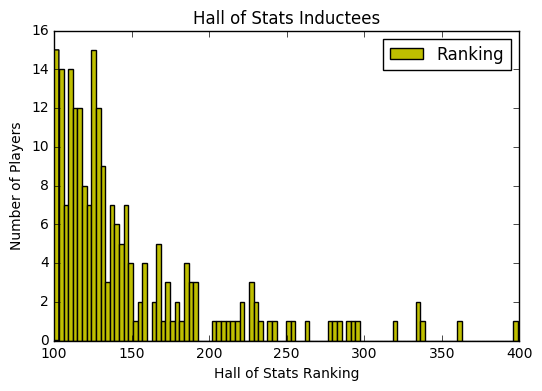

In [37]:
chart = df.plot(kind='hist', y='Ranking', bins=100, color=['y'])
chart.set_xlabel('Hall of Stats Ranking')
chart.set_ylabel('Number of Players')
chart.set_title('Hall of Stats Inductees')

chart
plt.show()